In [1]:
import keras


Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [3]:
import tensorflow as tf
import os

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_dir = 'concrete_crack_detection'

In [7]:
train_negative_dir = os.path.join(train_dir, 'Negative')
train_positive_dir = os.path.join(train_dir, 'Positive')

In [8]:
num_negative_tr = len(os.listdir(train_negative_dir))
num_positive_tr = len(os.listdir(train_positive_dir))

In [9]:
num_negative_tr

20000

In [10]:
num_positive_tr

20000

In [11]:
total_num = num_negative_tr + num_positive_tr
total_num

40000

In [12]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 40000 images belonging to 2 classes.


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 28000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [76]:
sample_training_images, y = next(train_data_gen)

In [77]:
y

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

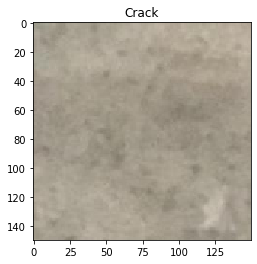

In [93]:
status=["Crack", "No crack"]
i=1
plt.imshow(sample_training_images[i])
plt.title(status[int(y[i])])
plt.show()

In [89]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    i=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

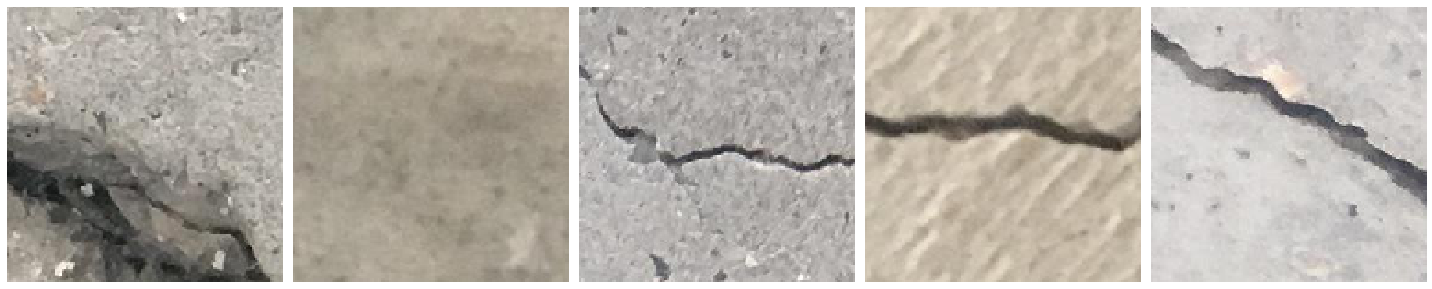

In [90]:
plotImages(sample_training_images[:5])

In [19]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 4000 // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
31/31 [==============================] - 209s 7s/step - loss: 2.0586 - accuracy: 0.5222 - val_loss: 0.6115 - val_accuracy: 0.5367
Epoch 2/5
31/31 [==============================] - 143s 5s/step - loss: 0.4142 - accuracy: 0.7845 - val_loss: 0.2242 - val_accuracy: 0.9055
Epoch 3/5
31/31 [==============================] - 133s 4s/step - loss: 0.1537 - accuracy: 0.9413 - val_loss: 0.1172 - val_accuracy: 0.9477
Epoch 4/5
31/31 [==============================] - 131s 4s/step - loss: 0.0943 - accuracy: 0.9670 - val_loss: 0.0897 - val_accuracy: 0.9639
Epoch 5/5
31/31 [==============================] - 136s 4s/step - loss: 0.0867 - accuracy: 0.9670 - val_loss: 0.0926 - val_accuracy: 0.9566


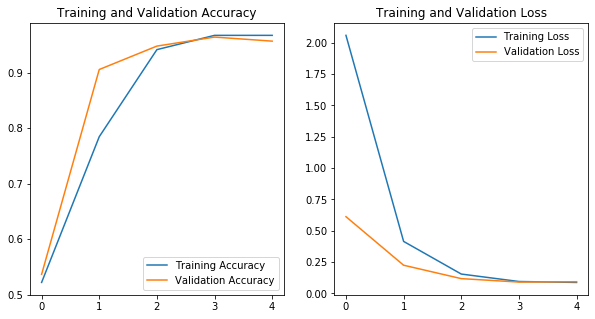

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
import glob
import cv2

In [37]:
test_dir = r'C:\Users\shubh\Documents\steel_detection\concrete_test'
test_positive_dir = os.path.join(test_dir, 'Positive')
test_negative_dir = os.path.join(test_dir, 'Negative')

file_paths=[]
for folder in [test_positive_dir,test_negative_dir]:
    print(len(glob.glob(os.path.join(folder, '*.jpg'))))
    file_paths.extend(glob.glob(os.path.join(folder, '*.jpg')))

2
2


In [41]:
images=[cv2.imread(path) for path in file_paths]
images=np.asarray([cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH)) for image in images])

In [42]:
X_test= images / 255

In [43]:
model.predict(X_test)

array([[24.463764],
       [10.046867],
       [ 8.802815],
       [38.201725]], dtype=float32)

In [100]:
results = model.evaluate(sample_training_images[:100], y[:100])

4/4 [==============================] - 0s 34ms/step - loss: 0.1099 - accuracy: 0.9500


In [102]:
model.predict(sample_training_images[:10])

array([[13.200285  ],
       [-3.6952946 ],
       [ 8.69724   ],
       [ 3.1487975 ],
       [ 2.4852078 ],
       [-0.4793643 ],
       [-0.15849608],
       [ 9.181622  ],
       [17.684921  ],
       [-2.6273556 ]], dtype=float32)